<a href="https://colab.research.google.com/github/ahmadjunditsabit/Data-Food/blob/main/Data_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('food_delivery_datasets.csv')

In [3]:
df['resto_id']=df['resto_id'].map(str)

In [4]:
df=df[df.status=='Completed']
df.reset_index(drop=True)

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
876,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
877,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
878,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
879,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [5]:
df['complated_order']=1

In [6]:
df=pd.concat([df['resto_id'],df['status'],df['complated_order']], axis=1)
df.columns=['resto_id','status','complated_order']
df.head()

,resto_id,status,complated_order
0,742638033,Completed,1
1,742767245,Completed,1
2,742618303,Completed,1
3,742541172,Completed,1
4,742604875,Completed,1


In [7]:
df=df.groupby(['resto_id'])
df1=df[['complated_order']].sum()
df1.reset_index()

,resto_id,complated_order
0,200000639,1
1,200000964,2
2,200001006,1
3,200001973,1
4,200002164,2
...,...,...
613,742807593,1
614,742808198,1
615,742808523,1
616,742809792,1


In [8]:
df_final=df1.sort_values(by='complated_order',ascending=False)
df_final.reset_index()

,resto_id,complated_order
0,742610474,10
1,742591683,9
2,742731698,7
3,742676756,7
4,742538031,7
...,...,...
613,742559775,1
614,742558808,1
615,742554928,1
616,742554236,1


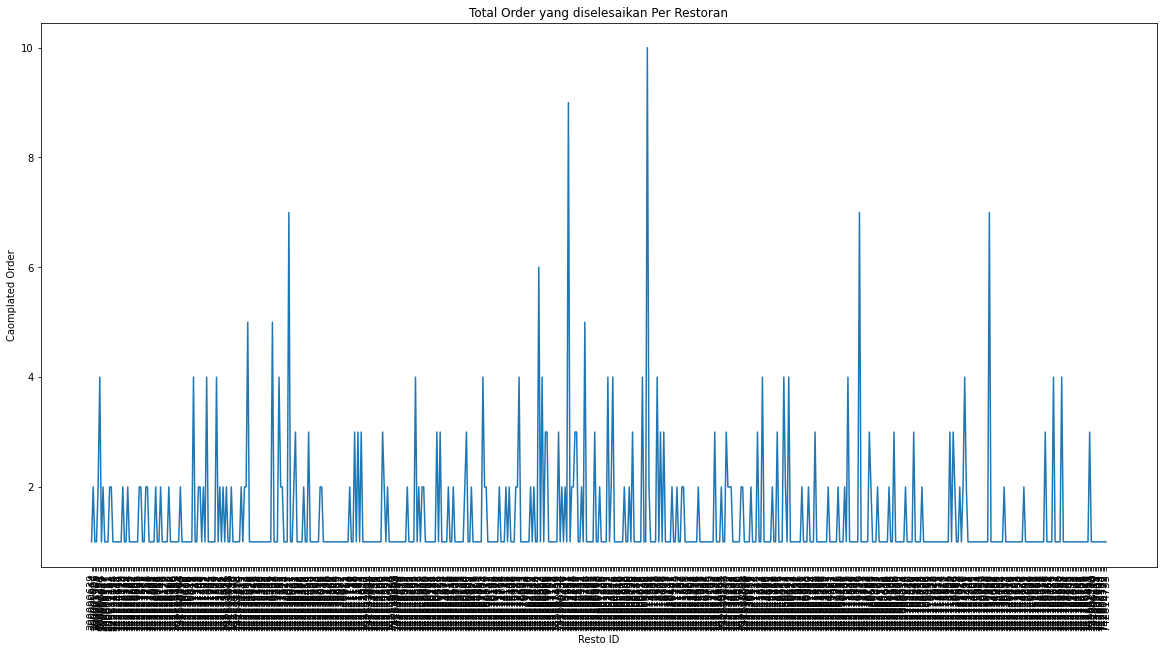

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df1)

plt.title('Total Order yang diselesaikan Per Restoran')
plt.xlabel('Resto ID')
plt.xticks(rotation=90)
plt.ylabel('Caomplated Order')

plt.show()